# Machine Learning topological phases in real space: Nearest-neighbours SSH model.

In this notebook we produce the results of the machine learning analysis of topological phase transitions occurring  in nearest-neighbours SSH models as decribed in the paper [Machine learning topological phases in real space](https://arxiv.org/abs/1901.01963).

## Running models with SSH data

In [1]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

CPU times: user 361 ms, sys: 60.2 ms, total: 421 ms
Wall time: 423 ms


In [2]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_90.csv"
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_90"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None 
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180980 entries, 0 to 1180979
Columns: 188 entries, id to feat179
dtypes: float64(183), int32(3), object(2)
memory usage: 1.6+ GB
CPU times: user 21.1 s, sys: 1.37 s, total: 22.4 s
Wall time: 21.5 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.003648,-0.001824,...,0.016354,-0.018154,0.012740,-0.014549,0.009111,-0.010927,0.005471,-0.007292,0.001824,-0.003648
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.007292,0.003648,...,0.032310,-0.035762,0.025293,-0.028818,0.018154,-0.021736,0.010927,-0.014549,0.003648,-0.007292
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.010927,0.005471,...,-0.047478,0.052295,-0.037472,0.042533,-0.027060,0.032310,-0.016354,0.021736,-0.005471,0.010927
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.014549,0.007292,...,0.061491,-0.067257,0.049099,-0.055429,0.035762,-0.042533,0.021736,-0.028818,0.007292,-0.014549
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.018154,0.009111,...,-0.074006,0.080198,-0.060002,0.067257,-0.044195,0.052295,-0.027060,0.035762,-0.009111,0.018154


#### Checking initialization

In [3]:
%%time
n_features = simulation.n_features
n_hamiltonians = simulation.n_hamiltonians
n_ts = simulation.n_ts

print("n_features: ", n_features)
print("n_hamiltonians: ", n_hamiltonians)
print("n_ts: ", n_ts)

n_features:  180
n_hamiltonians:  6561
n_ts:  2
CPU times: user 146 µs, sys: 10 µs, total: 156 µs
Wall time: 84.2 µs


In [4]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.846822130772748
% val:  0.0
% test:  0.15317786922725193
% train + val + test:  1.0


number of train hamiltonians:  5556
number of val hamiltonians:  0
number of test hamiltonians:  1005
total number of hamiltonians:  6561


train ids:  [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201

## Running a simulation

In [5]:
%%time
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False   
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments = n_experiments, start_n = start_n, fit_params = fit_params, \
                          pred_params=pred_params, random_features = random_features, \
                          store_in_lists=store_in_lists, save_eigenvector=save_eigenvector, \
                          save_hamiltonian=save_hamiltonian, save_accuracy=save_accuracy, save_model=save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [42:24<00:00, 25.60s/it]

CPU times: user 45min 40s, sys: 40.7 s, total: 46min 21s
Wall time: 42min 24s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.003648,-0.001824,...,0.016354,-0.018154,0.012740,-0.014549,0.009111,-0.010927,0.005471,-0.007292,0.001824,-0.003648
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.007292,0.003648,...,0.032310,-0.035762,0.025293,-0.028818,0.018154,-0.021736,0.010927,-0.014549,0.003648,-0.007292
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.010927,0.005471,...,-0.047478,0.052295,-0.037472,0.042533,-0.027060,0.032310,-0.016354,0.021736,-0.005471,0.010927
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.014549,0.007292,...,0.061491,-0.067257,0.049099,-0.055429,0.035762,-0.042533,0.021736,-0.028818,0.007292,-0.014549
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.018154,0.009111,...,-0.074006,0.080198,-0.060002,0.067257,-0.044195,0.052295,-0.027060,0.035762,-0.009111,0.018154
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.021736,0.010927,...,0.084719,-0.090729,0.070021,-0.077791,0.052295,-0.061491,0.032310,-0.042533,0.010927,-0.021736
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.025293,-0.012740,...,0.093369,-0.098533,0.079007,-0.086828,0.060002,-0.070021,0.037472,-0.049099,0.012740,-0.025293
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.028818,0.014549,...,0.099745,-0.103377,0.086828,-0.094193,0.067257,-0.077791,0.042533,-0.055429,0.014549,-0.028818
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.032310,0.016354,...,-0.103692,0.105114,-0.093369,0.099745,-0.074006,0.084719,-0.047478,0.061491,-0.016354,0.032310
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.003648,0.001824,...,0.016354,0.018154,0.012740,0.014549,0.009111,0.010927,0.005471,0.007292,0.001824,0.003648


#### Viewing a random sample

In [6]:
%%time
simulation.dataframe.sample(frac=0.1, replace=False)

CPU times: user 219 ms, sys: 0 ns, total: 219 ms
Wall time: 219 ms


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
1168442,6491,H_2_-1.45_0.00112471.dat,2.00,-1.45,0.001125,0,0,val,0.092410,0.062087,...,0.102519,0.082799,-0.068950,-0.096262,-0.036925,0.008777,0.104077,0.087912,-0.062087,-0.092410
147739,820,H_-1.5_-1.5_0.509296.dat,-1.50,-1.50,0.509296,0,0,test,-0.065845,-0.099154,...,0.104639,0.025293,-0.075291,0.044195,0.012740,-0.094193,0.055429,0.102653,-0.099154,-0.065845
70366,390,H_-1.8_1.3_0.00112221.dat,-1.80,1.30,0.001122,0,0,val,0.054142,-0.101317,...,0.036090,0.042886,-0.019937,0.086084,-0.070211,0.104441,-0.100224,0.092661,-0.101317,0.054142
859440,4774,H_0.9_1.8_1.00534.dat,0.90,1.80,1.005345,1,1,val,-0.093345,0.052655,...,-0.066840,-0.078735,-0.041138,0.098613,0.105043,-0.012843,-0.056412,-0.086686,-0.052655,0.093345
146202,812,H_-1.5_-1.9_1.01251.dat,-1.50,-1.90,1.012514,1,1,test,0.072766,-0.034559,...,0.026034,-0.066084,-0.051707,0.008896,-0.100690,0.078928,-0.093674,0.105063,-0.034559,0.072766
574530,3191,H_-0.05_-0.4_1.00306.dat,-0.05,-0.40,1.003058,1,1,val,0.052810,0.007384,...,-0.094669,0.052383,0.105235,-0.091181,-0.087522,0.105477,0.046288,-0.091428,0.007384,0.052810
142791,793,H_-1.55_1.2_0.00116782.dat,-1.55,1.20,0.001168,0,0,val,-0.084638,-0.053350,...,-0.095349,-0.105025,0.020942,0.059730,0.070530,0.034238,-0.104529,-0.100306,0.053350,0.084638
1092012,6066,H_1.7_1.6_-0.0482069.dat,1.70,1.60,-0.048207,0,0,test,0.062993,0.102243,...,0.099092,0.007811,-0.058411,0.056569,-0.005615,-0.098341,0.067396,0.100812,-0.102243,-0.062993
256101,1422,H_-1.15_0.25_0.000477766.dat,-1.15,0.25,0.000478,0,0,val,-0.035328,0.044230,...,0.101629,-0.103506,0.104143,-0.102724,0.094439,-0.089891,0.073655,-0.066511,0.044230,-0.035328
1160368,6446,H_1.95_0.35_-0.000584934.dat,1.95,0.35,-0.000585,0,0,val,0.104836,-0.102913,...,0.101492,-0.104541,-0.024756,0.006419,-0.102251,0.104737,0.021624,-0.003211,0.102913,-0.104836


#### Checking train/val/test splits again

In [7]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.08474317939338516
% val:  0.7620789513793629
% test:  0.15317786922725193
% train + val + test:  1.0


number of train hamiltonians:  556
number of val hamiltonians:  5000
number of test hamiltonians:  1005
total number of hamiltonians:  6561


train ids:  [5309, 6253, 5706, 4421, 5943, 871, 2926, 289, 5399, 4352, 3210, 3106, 792, 4937, 2585, 4642, 2152, 1972, 1498, 4416, 4569, 2413, 4417, 2029, 2773, 3343, 992, 5014, 1048, 6325, 5057, 4162, 5208, 3782, 6344, 2609, 3166, 4777, 6427, 3618, 1731, 5951, 2614, 3434, 3193, 5073, 4279, 1012, 3428, 1985, 4064, 3810, 795, 4277, 3222, 939, 6191, 51, 2191, 4404, 4883, 3823, 4602, 3145, 6026, 4361, 1292, 688, 6028, 3907, 6178, 4298, 4110, 2795, 1608, 1549, 708, 1468, 5969, 1260, 3851, 4456, 3674, 3330, 4402, 5454, 3911, 6259, 5932, 3304, 4865, 5387, 1043, 3368, 4685, 5865, 3613, 620, 2765, 4767, 1745, 4562, 2065, 1455, 5609, 285, 2531, 1335, 590, 1788, 4044, 5527, 5115, 4388, 929, 785, 6218, 3595, 1378, 38, 1240, 5141, 690, 2651, 6024

#### Checking summaries

In [8]:
%%time
ham_summary = simulation.hamiltonian_summary
print("length of ham_summary: ", len(ham_summary))
ham_summary

length of ham_summary:  6561
CPU times: user 129 µs, sys: 2 µs, total: 131 µs
Wall time: 99.9 µs


,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.572222,0.427778,0,0
1,-2.0,-1.95,test,0.750000,0.250000,0,0
2,-2.0,-1.90,test,0.816667,0.183333,0,0
3,-2.0,-1.85,test,0.877778,0.122222,0,0
4,-2.0,-1.80,test,0.938889,0.061111,0,0
5,-2.0,-1.75,test,0.988889,0.011111,0,0
6,-2.0,-1.70,test,0.983333,0.016667,0,0
7,-2.0,-1.65,test,0.977778,0.022222,0,0
8,-2.0,-1.60,test,0.994444,0.005556,0,0


In [9]:
eigen_summary = simulation.eigenvector_summary
print("length of ham_summary: ", len(eigen_summary))
eigen_summary

length of ham_summary:  1180980


,id,phase,pred_phase,type_of
0,0,0,1,test
1,0,0,1,test
2,0,0,0,test
3,0,0,1,test
4,0,0,1,test
5,0,0,1,test
6,0,0,1,test
7,0,0,1,test
8,0,0,0,test
9,0,0,1,test


#### Checking accuracies

In [10]:
simulation.accuracy

{'eigenvector_train': 1.0,
 'eigenvector_val': 0.9981111111111111,
 'eigenvector_test': 0.7892150359314538,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.8905472636815921}

#### Checking data stored in  memory

In [11]:
ham_summary_list = simulation.hamiltonian_summary_list
ham_summary_list

[]

In [12]:
eigen_summary_list = simulation.eigenvector_summary_list
eigen_summary_list

[]

In [13]:
accuracy_list = simulation.accuracy_list
accuracy_list

{'eigenvector_train': [],
 'eigenvector_val': [],
 'eigenvector_test': [],
 'hamiltonian_train': [],
 'hamiltonian_val': [],
 'hamiltonian_test': []}

#### Visualizing train/val/test splits

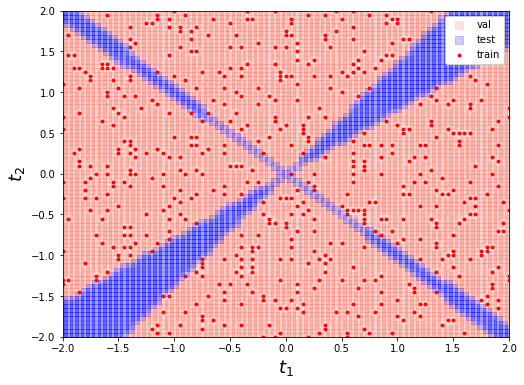

In [14]:
fig_params={"figsize": (8,6)} 
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
train_params={"marker": "o", "s": 8, "color": "red", "label": "train"}
legend_params={"framealpha": 1}
xlabel_params={"xlabel": "$t_1$", "fontsize": 18}
ylabel_params={"ylabel": "$t_2$", "fontsize": 18}
title_params={}
savefig_params = {}
simulation.visualize_scatter_2d(fig_params = fig_params, val_params = val_params, test_params = test_params,\
                                train_params = train_params, legend_params = legend_params, \
                                xlabel_params = xlabel_params, ylabel_params = ylabel_params, title_params = title_params,\
                               savefig_params = savefig_params)

# Analyzing simulation data

In [15]:
%load_ext autoreload
%autoreload 2
from data_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Testing Experiment class

In [16]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_90"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Viewing Train/Val/Test split

In [17]:
experiment.print_train_val_test()

% train:  0.08474317939338516
% val:  0.7620789513793629
% test:  0.15317786922725193
% train + val + test:  1.0


number of train hamiltonians:  556
number of val hamiltonians:  5000
number of test hamiltonians:  1005
total number of hamiltonians:  6561


#### Viewing dataset summary

In [18]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
0    0.507919
1    0.492081
Name: phase, dtype: float64


total train/val phases: 
0    2822
1    2734
Name: phase, dtype: int64


Summary of test data

% test phases: 
0    0.536318
1    0.463682
Name: phase, dtype: float64


total test phases: 
0    539
1    466
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
0    0.512269
1    0.487731
Name: phase, dtype: float64


total phases: 
0    3361
1    3200
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [19]:
experiment.eigenvector_summary.head()

,id,phase,pred_phase,type_of
0,0,0,1,test
1,0,0,0,test
2,0,0,1,test
3,0,0,1,test
4,0,0,0,test


#### Vieweng Hamiltonian summary

In [20]:
experiment.hamiltonian_summary.head()

,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.588889,0.411111,0,0
1,-2.0,-1.95,test,0.761111,0.238889,0,0
2,-2.0,-1.90,test,0.816667,0.183333,0,0
3,-2.0,-1.85,test,0.877778,0.122222,0,0
4,-2.0,-1.80,test,0.944444,0.055556,0,0


#### Viewing accuracy

In [21]:
experiment.accuracy

{'eigenvector_train': 1.0,
 'eigenvector_val': 0.9994644444444445,
 'eigenvector_test': 0.8100276395798783,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9990049751243781}

#### Visualizing train/val/test splits with scatter plot

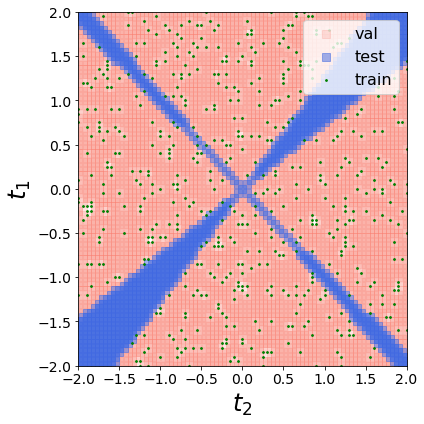

In [22]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
#val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
#test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
#train_params={"marker": "o", "s": 10, "color": "red", "label": "train"}
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"}
train_params={"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
#savefig_params = {"fname": os.path.join(experiment.simulation_dir, "fig1a-6561_train_val_test_0.png")}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_90_train_val_test_split_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_train_val_test(val_params, test_params, train_params, legend_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params,\
                                 tight_params, savefig_params)

#### Plotting train winding labels with scatter plot

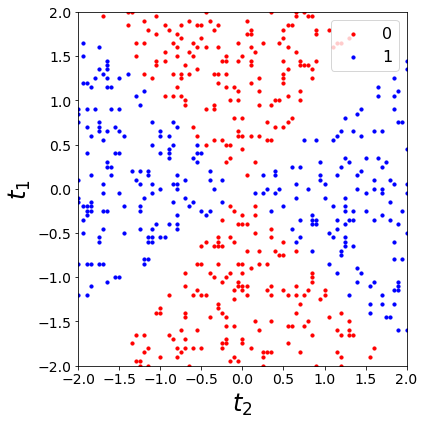

In [23]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}, \
                  }
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_90_train_winding_labels_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_winding_train(winding_params, legend_params, fig_params, xlabel_params, ylabel_params, \
                                 title_params,  xlim_params, ylim_params, xticks_params, yticks_params, \
                                 tight_params, savefig_params)

#### Plotting prediction grid with pcolormesh

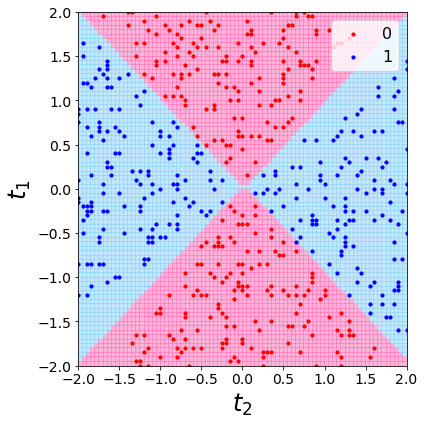

In [24]:
#fig_params, winding_params, contourf_params, legend_params, xlabel_params, ylabel_params, title_params, savefig_params)
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)}
#winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
#                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
#                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
#                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, 
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}}

#pcolormesh_params = {"cmap": ListedColormap(["hotpink", "orange", "lightgreen","lightskyblue"]), "alpha": 0.5}
pcolormesh_params = {"cmap": ListedColormap(["hotpink", "lightskyblue"]), "alpha": 0.5}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_90_prediction_grid_experiment_0.png"
savefig_params = {"fname": os.path.join(experiment.simulation_dir, path_to_save)}
experiment.pcolormesh_prediction_grid(winding_params, pcolormesh_params, legend_params, fig_params, xlabel_params, \
                                ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                                      tight_params,  savefig_params)

#### Plotting Winding Heatmaps

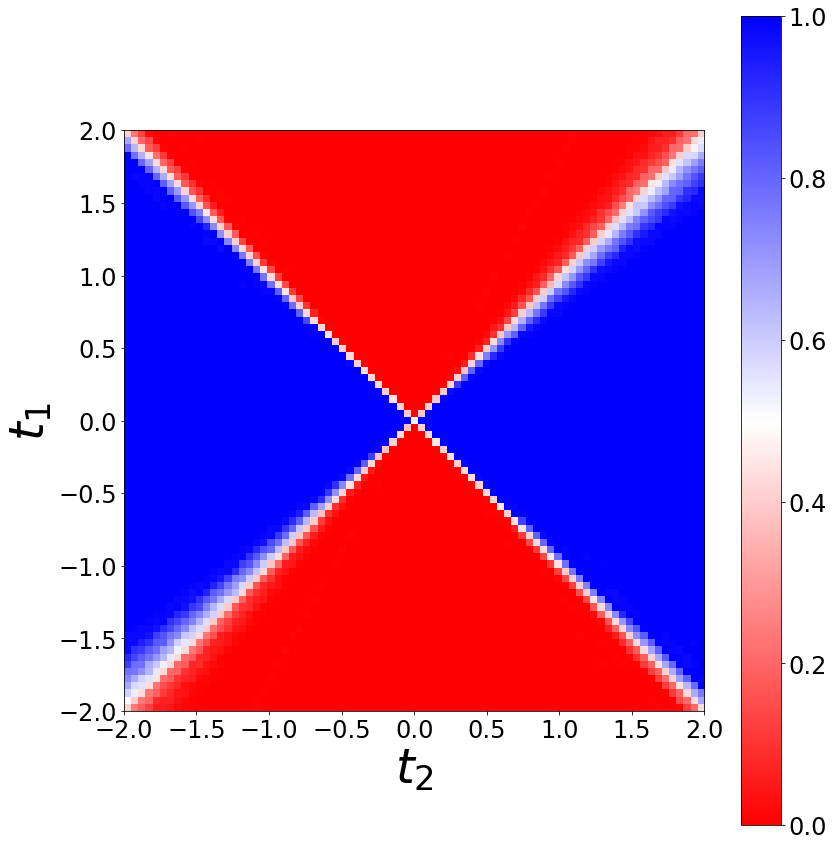

In [25]:
winding = 1
imshow_params = {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2],\
                "vmin": 0, "vmax":1}
colorbar_params={"mappable": None, "labelsize": 24}
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = False
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

## Testing ExperimentEnsemble Class

In [26]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_90"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [27]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 119954.79it/s]


#### Plotting simulation winding heatmaps

Skipping winding 0
Plotting winding 1


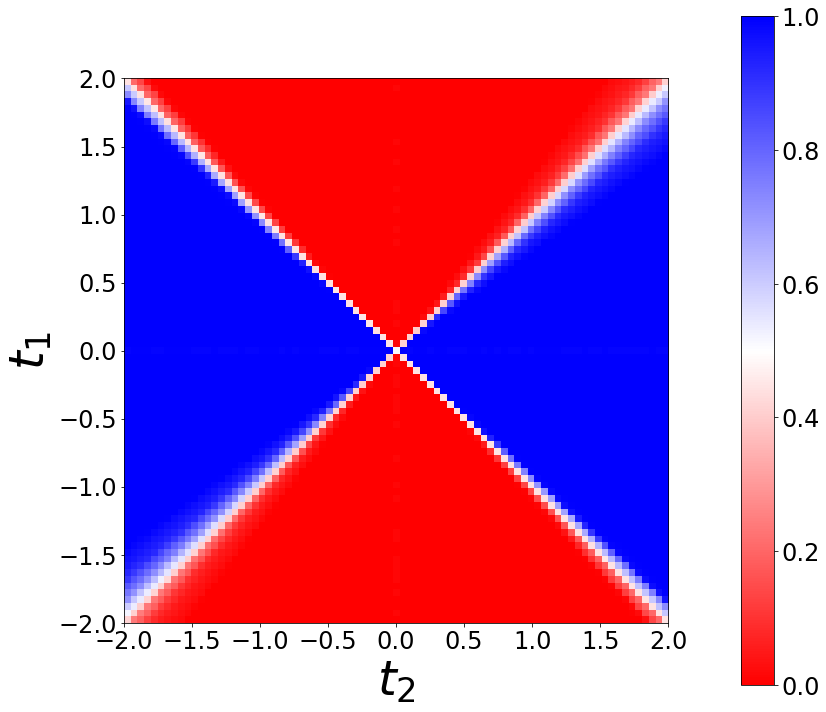

In [28]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_90_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

#### Computing mean accuracies

In [29]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk=save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:24<00:00,  4.06it/s]


{'eigenvector_train': 1.0,
 'eigenvector_val': 0.9989953777777779,
 'eigenvector_test': 0.8040484798231066,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9627761194029851}

#### Computing bootstrap accuracies

In [30]:
save_to_disk = True
simulation.compute_bootstrap_accuracy(save_to_disk=save_to_disk)
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9990049751243781}

#### Computing mean feature importances

In [31]:
import operator
save_to_disk = False
simulation.compute_mean_feature_importance(save_to_disk=save_to_disk)
### Sorted feature importances from highest to lowest
sorted_feature_importances = sorted(simulation.feature_importance.items(), key=operator.itemgetter(1),reverse=True)
print("Sorted feature importances: ", sorted_feature_importances)

mean feature importances: 100%|██████████| 100/100 [00:00<00:00, 2039.62it/s]

Sorted feature importances:  [(178, 0.30386919715676836), (176, 0.0757291017138171), (89, 0.0658291967729869), (0, 0.052290477286848915), (91, 0.05220408840130546), (90, 0.05077044195509115), (174, 0.04442311520946581), (170, 0.039629966275769826), (88, 0.032723663229157325), (1, 0.03174346726936164), (179, 0.026102872007080117), (3, 0.014620009254606244), (168, 0.005191417488423866), (166, 0.0051756540695309374), (9, 0.0042273569922418154), (165, 0.0042190797476290235), (157, 0.004014743814361861), (138, 0.003929582579894238), (53, 0.0036756038282438467), (100, 0.003584385717245956), (162, 0.0033359691547054653), (117, 0.0033267992980402267), (86, 0.003277087528299213), (93, 0.0032062363000323877), (65, 0.0032043519051711267), (62, 0.0031707764239286063), (5, 0.0030758493787353893), (14, 0.0030344621804310077), (120, 0.0029036791678709872), (126, 0.002743713322611718), (41, 0.0026243772303050123), (114, 0.0025760088423864512), (2, 0.002344836479321098), (164, 0.0023314744340624514), (

#### Plotting feature importances

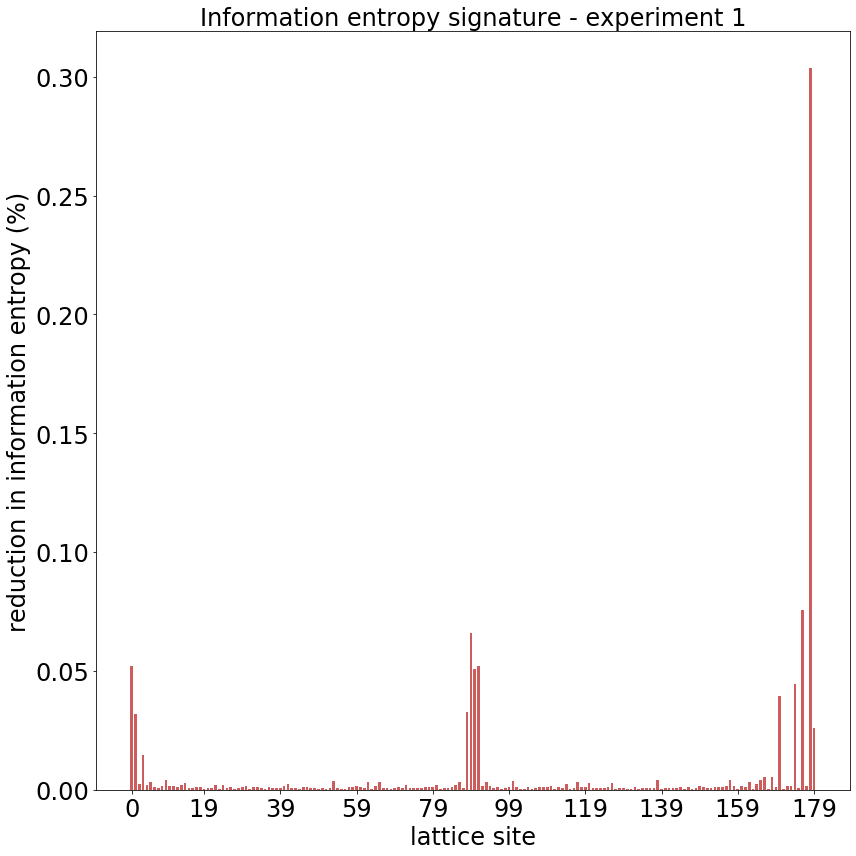

In [33]:
#plot_feature_importances(self, n_features=None, fig_params={}, xlabel_params={}, ylabel_params={}, title_params={})
n_features = None
plot_type = "bar"
plot_params = {"color": "indianred", "width": 0.7}
#plot_params=None
#hist_params = {"color": "tomato", "width": 0.7}
#hist_params = None
hist_precision = 1000
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {}
ylim_params = {}
xticks_params = {"ticks": np.linspace(0,179,10).astype(int), "fontsize": 24}
#xticks_params = {}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_90_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)

#### Plotting cumulative feature importances

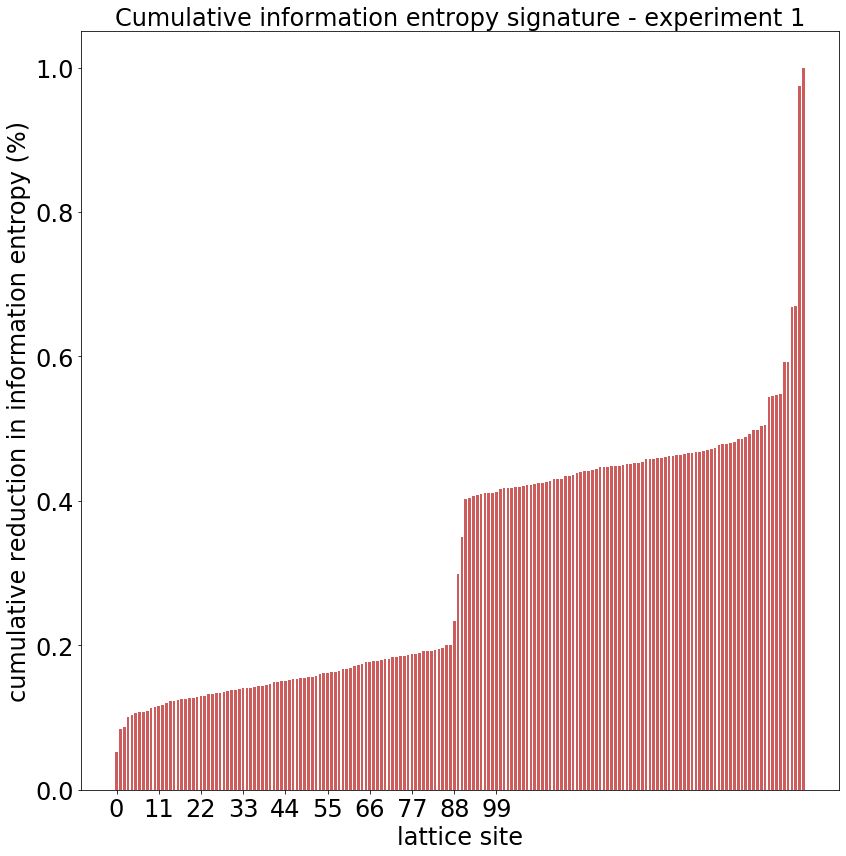

In [34]:
n_features = None
plot_type = "bar"
hist_precision = 1000
plot_params = {"color":"indianred", "width": 0.7}
fig_params={"figsize": (12,12)}
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "cumulative reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Cumulative information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
#xlim_params = {"left":-1, "right":100}
xlim_params = {}
ylim_params = {}
#xticks_params = {"ticks": np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,16).astype(int)] }
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_90_cumulative_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_cumulative_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)


# Running simulation with most relevant features: 1,138

We now rerun the simulations using the most relevant features only

In [35]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 175 µs, sys: 3 µs, total: 178 µs
Wall time: 128 µs


In [36]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_90.csv"           
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_90_feat_176_178"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [176,178]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180980 entries, 0 to 1180979
Columns: 188 entries, id to feat179
dtypes: float64(183), int32(3), object(2)
memory usage: 1.6+ GB
CPU times: user 21.3 s, sys: 1.19 s, total: 22.4 s
Wall time: 21.5 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.003648,-0.001824,...,0.016354,-0.018154,0.012740,-0.014549,0.009111,-0.010927,0.005471,-0.007292,0.001824,-0.003648
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.007292,0.003648,...,0.032310,-0.035762,0.025293,-0.028818,0.018154,-0.021736,0.010927,-0.014549,0.003648,-0.007292
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.010927,0.005471,...,-0.047478,0.052295,-0.037472,0.042533,-0.027060,0.032310,-0.016354,0.021736,-0.005471,0.010927
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.014549,0.007292,...,0.061491,-0.067257,0.049099,-0.055429,0.035762,-0.042533,0.021736,-0.028818,0.007292,-0.014549
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.018154,0.009111,...,-0.074006,0.080198,-0.060002,0.067257,-0.044195,0.052295,-0.027060,0.035762,-0.009111,0.018154


### Running simulation

In [37]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [07:12<00:00,  4.37s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.003648,-0.001824,...,0.016354,-0.018154,0.012740,-0.014549,0.009111,-0.010927,0.005471,-0.007292,0.001824,-0.003648
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.007292,0.003648,...,0.032310,-0.035762,0.025293,-0.028818,0.018154,-0.021736,0.010927,-0.014549,0.003648,-0.007292
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.010927,0.005471,...,-0.047478,0.052295,-0.037472,0.042533,-0.027060,0.032310,-0.016354,0.021736,-0.005471,0.010927
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.014549,0.007292,...,0.061491,-0.067257,0.049099,-0.055429,0.035762,-0.042533,0.021736,-0.028818,0.007292,-0.014549
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.018154,0.009111,...,-0.074006,0.080198,-0.060002,0.067257,-0.044195,0.052295,-0.027060,0.035762,-0.009111,0.018154
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.021736,0.010927,...,0.084719,-0.090729,0.070021,-0.077791,0.052295,-0.061491,0.032310,-0.042533,0.010927,-0.021736
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.025293,-0.012740,...,0.093369,-0.098533,0.079007,-0.086828,0.060002,-0.070021,0.037472,-0.049099,0.012740,-0.025293
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.028818,0.014549,...,0.099745,-0.103377,0.086828,-0.094193,0.067257,-0.077791,0.042533,-0.055429,0.014549,-0.028818
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.032310,0.016354,...,-0.103692,0.105114,-0.093369,0.099745,-0.074006,0.084719,-0.047478,0.061491,-0.016354,0.032310
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.003648,0.001824,...,0.016354,0.018154,0.012740,0.014549,0.009111,0.010927,0.005471,0.007292,0.001824,0.003648


#### Loading simulation

In [38]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_90_feat_176_178"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Computing Hamiltonian summary

In [39]:
simulation.n_experiments

100

In [40]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 118313.74it/s]


#### Computing mean accuracies with less features

In [41]:
simulation.n_experiments

100

In [42]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:25<00:00,  4.06it/s]


{'eigenvector_train': 0.9877048361310952,
 'eigenvector_val': 0.9261071111111111,
 'eigenvector_test': 0.6246223327805417,
 'hamiltonian_train': 0.9881834532374101,
 'hamiltonian_val': 0.985314,
 'hamiltonian_test': 0.9484278606965175}

#### Plotting heatmap for less features

Skipping winding 0
Plotting winding 1


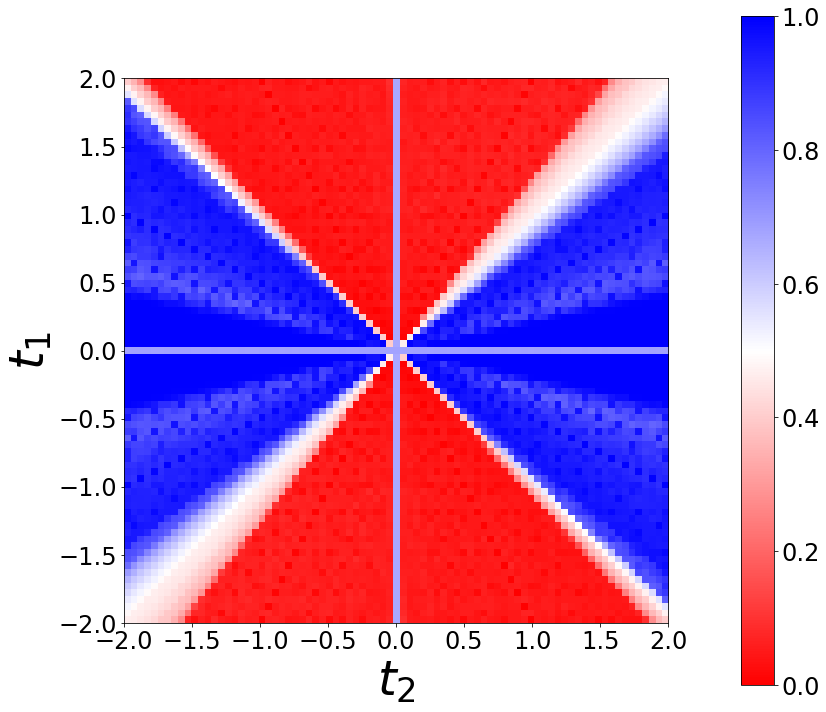

In [43]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_90_feat_176_178_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with most relevant features: 89,178

In [44]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 436 µs, sys: 10 µs, total: 446 µs
Wall time: 276 µs


In [50]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_90.csv"           
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_90_feat_89_178"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [89,178]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180980 entries, 0 to 1180979
Columns: 188 entries, id to feat179
dtypes: float64(183), int32(3), object(2)
memory usage: 1.6+ GB
CPU times: user 32 s, sys: 1.34 s, total: 33.3 s
Wall time: 33.6 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.003648,-0.001824,...,0.016354,-0.018154,0.012740,-0.014549,0.009111,-0.010927,0.005471,-0.007292,0.001824,-0.003648
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.007292,0.003648,...,0.032310,-0.035762,0.025293,-0.028818,0.018154,-0.021736,0.010927,-0.014549,0.003648,-0.007292
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.010927,0.005471,...,-0.047478,0.052295,-0.037472,0.042533,-0.027060,0.032310,-0.016354,0.021736,-0.005471,0.010927
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.014549,0.007292,...,0.061491,-0.067257,0.049099,-0.055429,0.035762,-0.042533,0.021736,-0.028818,0.007292,-0.014549
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.018154,0.009111,...,-0.074006,0.080198,-0.060002,0.067257,-0.044195,0.052295,-0.027060,0.035762,-0.009111,0.018154


### Running simulation

In [51]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [09:54<00:00,  4.52s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.003648,-0.001824,...,0.016354,-0.018154,0.012740,-0.014549,0.009111,-0.010927,0.005471,-0.007292,0.001824,-0.003648
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.007292,0.003648,...,0.032310,-0.035762,0.025293,-0.028818,0.018154,-0.021736,0.010927,-0.014549,0.003648,-0.007292
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.010927,0.005471,...,-0.047478,0.052295,-0.037472,0.042533,-0.027060,0.032310,-0.016354,0.021736,-0.005471,0.010927
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.014549,0.007292,...,0.061491,-0.067257,0.049099,-0.055429,0.035762,-0.042533,0.021736,-0.028818,0.007292,-0.014549
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.018154,0.009111,...,-0.074006,0.080198,-0.060002,0.067257,-0.044195,0.052295,-0.027060,0.035762,-0.009111,0.018154
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.021736,0.010927,...,0.084719,-0.090729,0.070021,-0.077791,0.052295,-0.061491,0.032310,-0.042533,0.010927,-0.021736
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.025293,-0.012740,...,0.093369,-0.098533,0.079007,-0.086828,0.060002,-0.070021,0.037472,-0.049099,0.012740,-0.025293
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.028818,0.014549,...,0.099745,-0.103377,0.086828,-0.094193,0.067257,-0.077791,0.042533,-0.055429,0.014549,-0.028818
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.032310,0.016354,...,-0.103692,0.105114,-0.093369,0.099745,-0.074006,0.084719,-0.047478,0.061491,-0.016354,0.032310
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.003648,0.001824,...,0.016354,0.018154,0.012740,0.014549,0.009111,0.010927,0.005471,0.007292,0.001824,0.003648


#### Loading simulation

In [52]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_90_feat_89_178"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Computing Hamiltonian summary

In [53]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 135425.31it/s]


#### Computing mean accuracies with features 89,178

In [54]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:25<00:00,  4.08it/s]


{'eigenvector_train': 0.9875386690647481,
 'eigenvector_val': 0.9144365000000001,
 'eigenvector_test': 0.683944278606965,
 'hamiltonian_train': 0.9880755395683454,
 'hamiltonian_val': 0.9853260000000001,
 'hamiltonian_test': 0.9572437810945275}

#### Plotting heatmap for features 89,178

Skipping winding 0
Plotting winding 1


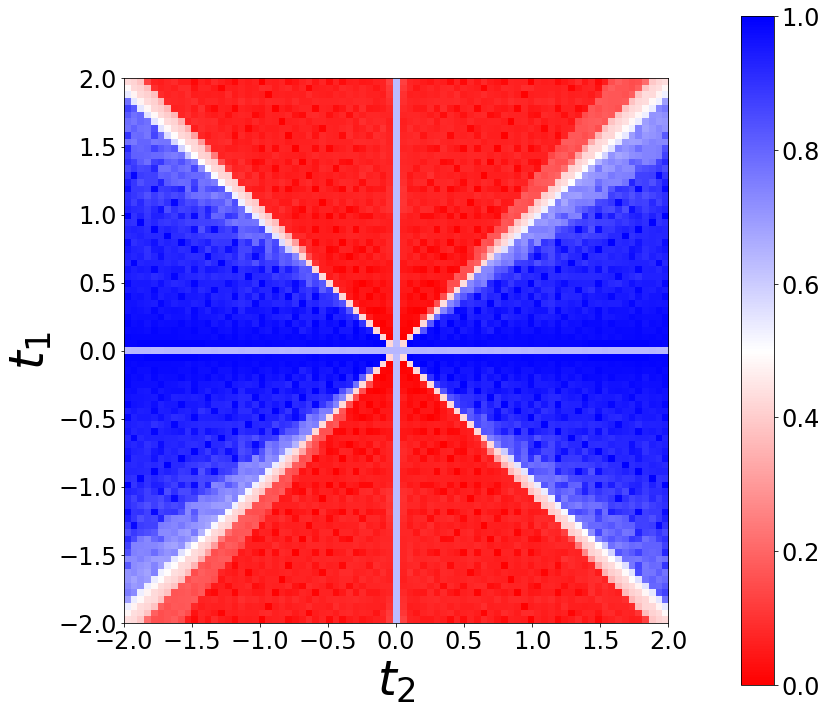

In [55]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_90_feat_89_178_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with random features (2 random features)

In [56]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_90.csv"                   
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_90_random_feat_2"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180980 entries, 0 to 1180979
Columns: 188 entries, id to feat179
dtypes: float64(183), int32(3), object(2)
memory usage: 1.6+ GB
CPU times: user 21.9 s, sys: 1.21 s, total: 23.1 s
Wall time: 22 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.003648,-0.001824,...,0.016354,-0.018154,0.012740,-0.014549,0.009111,-0.010927,0.005471,-0.007292,0.001824,-0.003648
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.007292,0.003648,...,0.032310,-0.035762,0.025293,-0.028818,0.018154,-0.021736,0.010927,-0.014549,0.003648,-0.007292
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.010927,0.005471,...,-0.047478,0.052295,-0.037472,0.042533,-0.027060,0.032310,-0.016354,0.021736,-0.005471,0.010927
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.014549,0.007292,...,0.061491,-0.067257,0.049099,-0.055429,0.035762,-0.042533,0.021736,-0.028818,0.007292,-0.014549
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.018154,0.009111,...,-0.074006,0.080198,-0.060002,0.067257,-0.044195,0.052295,-0.027060,0.035762,-0.009111,0.018154


#### Running simulation

In [57]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = 2
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features, \
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments:   0%|          | 0/100 [00:00<?, ?it/s]

random_features:  [38 77]


running experiments:   1%|          | 1/100 [00:04<07:52,  4.77s/it]

random_features:  [131 178]


running experiments:   2%|▏         | 2/100 [00:09<07:50,  4.80s/it]

random_features:  [175  71]


running experiments:   3%|▎         | 3/100 [00:14<07:47,  4.81s/it]

random_features:  [45 85]


running experiments:   4%|▍         | 4/100 [00:19<07:41,  4.81s/it]

random_features:  [136 156]


running experiments:   5%|▌         | 5/100 [00:23<07:29,  4.73s/it]

random_features:  [143  34]


running experiments:   6%|▌         | 6/100 [00:28<07:16,  4.64s/it]

random_features:  [98 62]


running experiments:   7%|▋         | 7/100 [00:32<07:11,  4.64s/it]

random_features:  [119  97]


running experiments:   8%|▊         | 8/100 [00:37<07:04,  4.61s/it]

random_features:  [81 26]


running experiments:   9%|▉         | 9/100 [00:42<07:03,  4.66s/it]

random_features:  [ 90 105]


running experiments:  10%|█         | 10/100 [00:46<06:57,  4.63s/it]

random_features:  [  7 178]


running experiments:  11%|█         | 11/100 [00:51<06:53,  4.65s/it]

random_features:  [71 15]


running experiments:  12%|█▏        | 12/100 [00:56<06:54,  4.71s/it]

random_features:  [104 175]


running experiments:  13%|█▎        | 13/100 [01:01<06:59,  4.82s/it]

random_features:  [82 53]


running experiments:  14%|█▍        | 14/100 [01:06<06:58,  4.86s/it]

random_features:  [171 177]


running experiments:  15%|█▌        | 15/100 [01:11<06:56,  4.90s/it]

random_features:  [151 163]


running experiments:  16%|█▌        | 16/100 [01:16<06:55,  4.95s/it]

random_features:  [57 65]


running experiments:  17%|█▋        | 17/100 [01:21<06:48,  4.93s/it]

random_features:  [55 12]


running experiments:  18%|█▊        | 18/100 [01:26<06:38,  4.87s/it]

random_features:  [155 171]


running experiments:  19%|█▉        | 19/100 [01:30<06:23,  4.73s/it]

random_features:  [58 55]


running experiments:  20%|██        | 20/100 [01:35<06:17,  4.72s/it]

random_features:  [117  70]


running experiments:  21%|██        | 21/100 [01:39<06:11,  4.71s/it]

random_features:  [ 19 120]


running experiments:  22%|██▏       | 22/100 [01:44<06:08,  4.73s/it]

random_features:  [160   3]


running experiments:  23%|██▎       | 23/100 [01:49<06:04,  4.73s/it]

random_features:  [8 0]


running experiments:  24%|██▍       | 24/100 [01:54<06:01,  4.75s/it]

random_features:  [ 56 152]


running experiments:  25%|██▌       | 25/100 [01:58<05:50,  4.67s/it]

random_features:  [169  64]


running experiments:  26%|██▌       | 26/100 [02:03<05:43,  4.64s/it]

random_features:  [71 16]


running experiments:  27%|██▋       | 27/100 [02:08<05:45,  4.73s/it]

random_features:  [ 57 174]


running experiments:  28%|██▊       | 28/100 [02:12<05:40,  4.73s/it]

random_features:  [  1 109]


running experiments:  29%|██▉       | 29/100 [02:17<05:31,  4.67s/it]

random_features:  [ 8 73]


running experiments:  30%|███       | 30/100 [02:22<05:26,  4.67s/it]

random_features:  [88 24]


running experiments:  31%|███       | 31/100 [02:26<05:16,  4.58s/it]

random_features:  [31  2]


running experiments:  32%|███▏      | 32/100 [02:31<05:13,  4.61s/it]

random_features:  [  7 122]


running experiments:  33%|███▎      | 33/100 [02:35<05:10,  4.63s/it]

random_features:  [132  90]


running experiments:  34%|███▍      | 34/100 [02:40<05:04,  4.62s/it]

random_features:  [55 83]


running experiments:  35%|███▌      | 35/100 [02:44<04:57,  4.57s/it]

random_features:  [  6 139]


running experiments:  36%|███▌      | 36/100 [02:49<04:53,  4.59s/it]

random_features:  [165   2]


running experiments:  37%|███▋      | 37/100 [02:54<04:56,  4.71s/it]

random_features:  [ 74 118]


running experiments:  38%|███▊      | 38/100 [02:58<04:48,  4.65s/it]

random_features:  [88 30]


running experiments:  39%|███▉      | 39/100 [03:03<04:38,  4.57s/it]

random_features:  [40 47]


running experiments:  40%|████      | 40/100 [03:08<04:36,  4.60s/it]

random_features:  [10 51]


running experiments:  41%|████      | 41/100 [03:12<04:31,  4.60s/it]

random_features:  [179 146]


running experiments:  42%|████▏     | 42/100 [03:17<04:34,  4.73s/it]

random_features:  [15 23]


running experiments:  43%|████▎     | 43/100 [03:22<04:24,  4.65s/it]

random_features:  [98 33]


running experiments:  44%|████▍     | 44/100 [03:26<04:24,  4.72s/it]

random_features:  [44 11]


running experiments:  45%|████▌     | 45/100 [03:31<04:16,  4.66s/it]

random_features:  [18 79]


running experiments:  46%|████▌     | 46/100 [03:35<04:07,  4.59s/it]

random_features:  [ 61 125]


running experiments:  47%|████▋     | 47/100 [03:40<04:02,  4.58s/it]

random_features:  [146  89]


running experiments:  48%|████▊     | 48/100 [03:47<04:36,  5.32s/it]

random_features:  [98 50]


running experiments:  49%|████▉     | 49/100 [03:55<05:07,  6.03s/it]

random_features:  [82 98]


running experiments:  50%|█████     | 50/100 [04:03<05:34,  6.68s/it]

random_features:  [81 30]


running experiments:  51%|█████     | 51/100 [04:11<05:52,  7.20s/it]

random_features:  [64 24]


running experiments:  52%|█████▏    | 52/100 [04:19<05:58,  7.47s/it]

random_features:  [146  32]


running experiments:  53%|█████▎    | 53/100 [04:28<06:00,  7.67s/it]

random_features:  [155 166]


running experiments:  54%|█████▍    | 54/100 [04:35<05:55,  7.73s/it]

random_features:  [167 114]


running experiments:  55%|█████▌    | 55/100 [04:43<05:51,  7.80s/it]

random_features:  [12 42]


running experiments:  56%|█████▌    | 56/100 [04:52<05:54,  8.05s/it]

random_features:  [136 112]


running experiments:  57%|█████▋    | 57/100 [05:00<05:49,  8.12s/it]

random_features:  [118 157]


running experiments:  58%|█████▊    | 58/100 [05:09<05:42,  8.16s/it]

random_features:  [120 174]


running experiments:  59%|█████▉    | 59/100 [05:17<05:37,  8.22s/it]

random_features:  [ 1 46]


running experiments:  60%|██████    | 60/100 [05:24<05:13,  7.85s/it]

random_features:  [11 10]


running experiments:  61%|██████    | 61/100 [05:28<04:27,  6.87s/it]

random_features:  [133  28]


running experiments:  62%|██████▏   | 62/100 [05:33<03:53,  6.16s/it]

random_features:  [62 14]


running experiments:  63%|██████▎   | 63/100 [05:38<03:31,  5.73s/it]

random_features:  [38 52]


running experiments:  64%|██████▍   | 64/100 [05:46<03:53,  6.49s/it]

random_features:  [117  87]


running experiments:  65%|██████▌   | 65/100 [05:54<04:02,  6.92s/it]

random_features:  [ 98 127]


running experiments:  66%|██████▌   | 66/100 [06:02<04:11,  7.40s/it]

random_features:  [ 79 166]


running experiments:  67%|██████▋   | 67/100 [06:11<04:13,  7.69s/it]

random_features:  [112 140]


running experiments:  68%|██████▊   | 68/100 [06:19<04:09,  7.81s/it]

random_features:  [24 19]


running experiments:  69%|██████▉   | 69/100 [06:27<04:06,  7.94s/it]

random_features:  [10  9]


running experiments:  70%|███████   | 70/100 [06:35<03:56,  7.89s/it]

random_features:  [167  57]


running experiments:  71%|███████   | 71/100 [06:43<03:54,  8.10s/it]

random_features:  [119  42]


running experiments:  72%|███████▏  | 72/100 [06:52<03:51,  8.26s/it]

random_features:  [103  68]


running experiments:  73%|███████▎  | 73/100 [07:00<03:40,  8.18s/it]

random_features:  [ 92 163]


running experiments:  74%|███████▍  | 74/100 [07:08<03:33,  8.22s/it]

random_features:  [79 63]


running experiments:  75%|███████▌  | 75/100 [07:16<03:23,  8.14s/it]

random_features:  [55 47]


running experiments:  76%|███████▌  | 76/100 [07:25<03:15,  8.14s/it]

random_features:  [161 121]


running experiments:  77%|███████▋  | 77/100 [07:32<03:05,  8.07s/it]

random_features:  [ 53 177]


running experiments:  78%|███████▊  | 78/100 [07:41<03:00,  8.18s/it]

random_features:  [23 37]


running experiments:  79%|███████▉  | 79/100 [07:49<02:53,  8.28s/it]

random_features:  [25 98]


running experiments:  80%|████████  | 80/100 [07:58<02:46,  8.32s/it]

random_features:  [98 65]


running experiments:  81%|████████  | 81/100 [08:06<02:38,  8.32s/it]

random_features:  [177  13]


running experiments:  82%|████████▏ | 82/100 [08:14<02:27,  8.22s/it]

random_features:  [77 45]


running experiments:  83%|████████▎ | 83/100 [08:22<02:19,  8.21s/it]

random_features:  [ 41 177]


running experiments:  84%|████████▍ | 84/100 [08:28<01:58,  7.41s/it]

random_features:  [19  5]


running experiments:  85%|████████▌ | 85/100 [08:32<01:38,  6.57s/it]

random_features:  [109 165]


running experiments:  86%|████████▌ | 86/100 [08:39<01:32,  6.60s/it]

random_features:  [44 73]


running experiments:  87%|████████▋ | 87/100 [08:47<01:32,  7.11s/it]

random_features:  [15 49]


running experiments:  88%|████████▊ | 88/100 [08:56<01:30,  7.51s/it]

random_features:  [113 110]


running experiments:  89%|████████▉ | 89/100 [09:04<01:25,  7.76s/it]

random_features:  [127  78]


running experiments:  90%|█████████ | 90/100 [09:12<01:18,  7.87s/it]

random_features:  [118 127]


running experiments:  91%|█████████ | 91/100 [09:21<01:12,  8.00s/it]

random_features:  [90 64]


running experiments:  92%|█████████▏| 92/100 [09:29<01:05,  8.15s/it]

random_features:  [ 62 100]


running experiments:  93%|█████████▎| 93/100 [09:37<00:57,  8.18s/it]

random_features:  [11 36]


running experiments:  94%|█████████▍| 94/100 [09:46<00:49,  8.25s/it]

random_features:  [ 41 165]


running experiments:  95%|█████████▌| 95/100 [09:54<00:41,  8.36s/it]

random_features:  [17 15]


running experiments:  96%|█████████▌| 96/100 [10:03<00:33,  8.47s/it]

random_features:  [168  19]


running experiments:  97%|█████████▋| 97/100 [10:11<00:25,  8.38s/it]

random_features:  [ 12 124]


running experiments:  98%|█████████▊| 98/100 [10:20<00:16,  8.33s/it]

random_features:  [150  91]


running experiments:  99%|█████████▉| 99/100 [10:27<00:08,  8.19s/it]

random_features:  [  0 114]


running experiments: 100%|██████████| 100/100 [10:36<00:00,  8.34s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.003648,-0.001824,...,0.016354,-0.018154,0.012740,-0.014549,0.009111,-0.010927,0.005471,-0.007292,0.001824,-0.003648
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.007292,0.003648,...,0.032310,-0.035762,0.025293,-0.028818,0.018154,-0.021736,0.010927,-0.014549,0.003648,-0.007292
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.010927,0.005471,...,-0.047478,0.052295,-0.037472,0.042533,-0.027060,0.032310,-0.016354,0.021736,-0.005471,0.010927
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.014549,0.007292,...,0.061491,-0.067257,0.049099,-0.055429,0.035762,-0.042533,0.021736,-0.028818,0.007292,-0.014549
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.018154,0.009111,...,-0.074006,0.080198,-0.060002,0.067257,-0.044195,0.052295,-0.027060,0.035762,-0.009111,0.018154
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.021736,0.010927,...,0.084719,-0.090729,0.070021,-0.077791,0.052295,-0.061491,0.032310,-0.042533,0.010927,-0.021736
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.025293,-0.012740,...,0.093369,-0.098533,0.079007,-0.086828,0.060002,-0.070021,0.037472,-0.049099,0.012740,-0.025293
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.028818,0.014549,...,0.099745,-0.103377,0.086828,-0.094193,0.067257,-0.077791,0.042533,-0.055429,0.014549,-0.028818
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.032310,0.016354,...,-0.103692,0.105114,-0.093369,0.099745,-0.074006,0.084719,-0.047478,0.061491,-0.016354,0.032310
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.003648,0.001824,...,0.016354,0.018154,0.012740,0.014549,0.009111,0.010927,0.005471,0.007292,0.001824,0.003648


#### Loading simulation with random features

In [58]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_90_random_feat_2"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Computing Hamiltonian summary for simulation with random features

In [59]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 83716.12it/s]


#### Computing mean accuracies for simulation with random features

In [60]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:44<00:00,  2.16it/s]


{'eigenvector_train': 0.9862782773780974,
 'eigenvector_val': 0.9421515222222223,
 'eigenvector_test': 0.716892703150912,
 'hamiltonian_train': 0.9873920863309351,
 'hamiltonian_val': 0.9853740000000002,
 'hamiltonian_test': 0.8858805970149255}

#### Plotting heatmap for simulation with random features

Skipping winding 0
Plotting winding 1


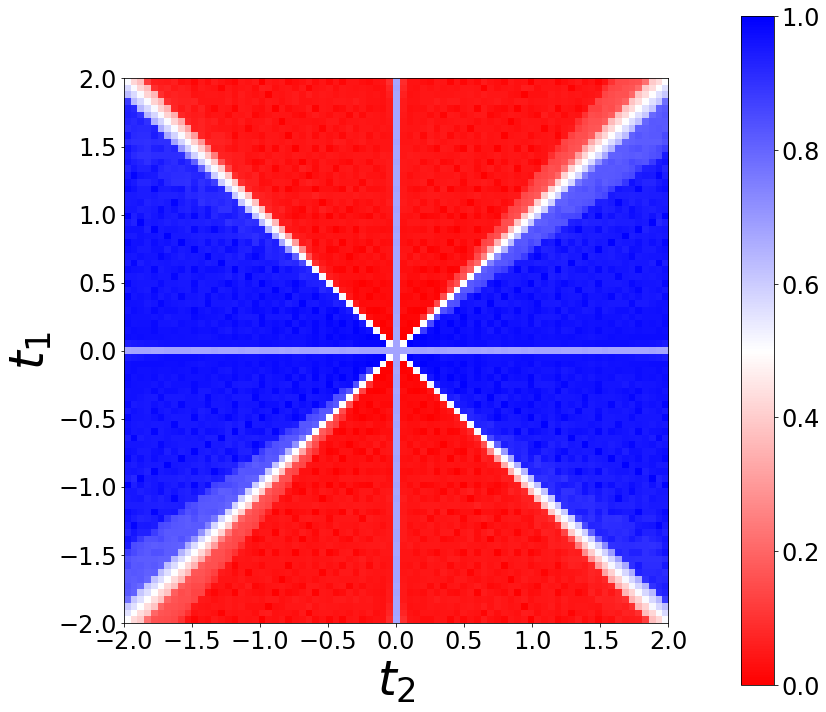

In [61]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_90_random_feat_2_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)